<img src="https://lh3.googleusercontent.com/pw/AM-JKLVhTn_UySwMdfMwXvoq8l3VN7IkrY9cwtH2YJVMxAlMznUBWC9IpFtgPRIyfAXru4oykkYD-1WjWi0Ao5XgkB9JICvzDBcfn0L_5X2_KOOppsURK5DfSifCC-s7Vx5oQrBUn_BNWn_hfAPdhlVbKQGE=w1097-h235-no?authuser=0" alt="2021年度ゲノム情報解析入門" height="100px" align="middle">

<div align="right"><a href="https://github.com/CropEvol/lecture#section2">実習表ページに戻る</a></div>

# 機械学習 - 線形回帰（2）-

　[機械学習 - 線形回帰（1）](https://colab.research.google.com/github/CropEvol/lecture/blob/master/textbook_2021/L12_ML_regression_1.ipynb)では、説明変数（1遺伝子の発現量）をひとつ使い、その遺伝子発現量から表現型値を予測する線形回帰モデルを構築しました。しかし、そのモデルの評価値（決定係数 $R^2$ ）は低く、良いモデルではありませんでした。

　今回、使用する説明変数を増やして、より良い線形回帰モデルを作ってみましょう。


<img src="https://github.com/CropEvol/lecture/blob/master/textbook_2021/images/regression_models.png?raw=true" alt="regression_models" height="400px">


---

## 今回の実習内容

1. 線形回帰 Linear regression（2変数以上）


### 線形回帰モデル


　ここでおこなう解析の目標は次のとおりです。
> 遺伝子発現量から表現型値を予測する線形回帰モデルを作る

　「線形回帰モデル」とは何か？　遺伝子発現量（$x$）と表現型値（$y$）の関係を次の方程式で表したモデルのことです。

線形回帰モデルの方程式: 

<img src="https://github.com/CropEvol/lecture/blob/2018/textbook_2018/09_statistics/data/regression_base.png?raw=true" alt="regression" height="130px">

- **目的変数（objective variable）**: 予測される変数$y$。今回の場合、表現型値。
- **説明変数（explanatory variable）**: 予測に使う変数$x$。今回の場合、各遺伝子発現量。
- **偏回帰係数（coefficient）**: 各説明変数の重み。目的変数の予測にその変数がどれぐらい影響するかを示す指標。
- **誤差（intercept; 切片）**: 説明変数以外の影響を示す項。

　偏回帰係数や誤差の値は、データから推定します。「線形回帰モデルを作る」とは、それらの推定値を得ることに相当します。

### 実習で使用するデータセット

　次のコードセルを実行して、データファイル（[gene_expression.csv](https://github.com/CropEvol/lecture/blob/master/textbook_2019/dataset/gene_expression.csv)）をダウンロードしてください。

ファイルの詳細:
- ファイル名: gene_expression.csv
- カンマ区切りテキストファイル
- 100行（100サンプル） x 51列（表現型値 + 50個の遺伝子発現量）


In [18]:
### このコードセルは実行のみ ###
# サンプルデータのダウンロード
!wget -q -O gene_expression.csv https://raw.githubusercontent.com/CropEvol/lecture/master/textbook_2019/dataset/gene_expression.csv

# pandasで読み込み
import pandas as pd
df = pd.read_csv("gene_expression.csv", sep=",", header=0)
df

,phenotype,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,gene_40,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,gene_50
0,106,13.363546,9.278575,5.358185,0.0,9.765873,8.267274,8.848567,8.651335,0.000000,8.002230,8.366921,8.514351,10.887784,0.000000,9.774787,5.190678,3.764463,12.259178,11.218678,10.832407,2.571919,8.963477,10.996029,10.287828,0.000000,9.988457,3.559663,10.178441,11.031060,0.000000,3.856906,9.876285,12.381172,1.024462,1.484705,3.811430,7.298979,6.028980,2.052242,7.156204,9.181366,6.790668,8.519664,8.670568,5.904554,9.069909,0.925468,13.735503,8.783810,9.430137
1,109,13.046248,11.941187,6.384982,0.0,8.924542,8.799204,9.670269,8.171432,1.096936,6.360194,9.221483,8.613462,9.515351,0.000000,9.157463,6.023834,2.546092,12.522574,10.916798,11.271603,0.000000,9.275510,10.878472,10.277322,0.361432,10.539614,4.106859,9.382164,13.289126,0.000000,4.387618,9.704644,11.847981,1.147828,1.712772,3.165542,7.152082,3.956205,1.712772,8.527016,9.119561,7.666501,9.198592,8.630143,4.655506,7.797830,0.650305,13.732358,9.361080,8.794585
2,119,13.097211,9.040640,4.770866,0.0,9.704101,7.710614,8.763461,8.279875,0.471760,8.292386,8.464962,8.098364,9.326176,0.000000,10.089808,2.393553,3.362133,12.664074,11.155229,11.293477,2.591703,9.319205,11.125568,10.224629,0.826681,9.593610,0.000000,9.201876,12.856612,0.000000,3.822771,9.918771,11.291251,0.000000,0.000000,3.610759,9.226304,4.888568,1.731487,8.571476,8.162089,7.402986,9.271246,9.998943,6.334062,6.989695,0.000000,13.804555,9.067929,7.143628
3,93,15.187503,8.813056,5.511784,0.0,9.434128,9.329489,10.592504,7.566518,4.776025,7.920996,8.632912,8.309035,10.498610,0.703544,10.775907,8.046338,2.984389,11.851566,9.509466,10.458437,0.703544,8.616836,10.440931,9.815484,1.174470,9.902380,5.749454,8.294671,9.954150,0.000000,2.984389,9.618461,11.097670,0.000000,0.000000,4.217153,9.311049,6.574106,4.523480,6.834610,10.464229,8.637473,8.434903,8.889617,2.984389,7.276041,3.950123,14.342589,9.908996,12.049794
4,84,14.076757,7.670217,4.338645,0.0,10.950235,9.461948,9.954554,9.512503,0.000000,5.813361,7.406503,6.645653,10.005274,0.000000,6.659796,5.721960,2.683629,13.191783,9.930696,10.792310,0.000000,8.557602,10.465964,10.450283,0.000000,10.246337,4.504550,6.774721,9.236043,0.000000,3.069943,11.052935,11.918971,0.000000,0.990084,3.374344,9.280504,3.625574,2.683629,10.251021,9.960994,6.819502,9.416861,9.173680,3.152265,4.762205,2.154486,13.137153,9.657865,7.594929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,13.346763,8.601243,5.679286,0.0,9.508676,8.637904,8.885413,6.878897,1.056930,7.110854,8.058165,8.405975,9.197526,0.000000,10.545727,6.821481,2.173639,11.483569,11.405126,10.793969,0.000000,9.072205,10.140536,9.828387,1.389952,9.103007,6.540901,2.678635,10.399257,0.000000,4.532953,9.385317,11.888507,0.000000,0.344942,5.527033,6.824921,6.381766,3.098201,9.582710,7.940948,7.895842,8.682219,9.885536,6.010762,10.732532,2.336826,14.542288,9.426110,11.623287
96,103,12.535288,7.530406,6.515419,0.0,9.315795,9.186164,8.653254,8.906494,0.842939,7.766072,8.279884,7.785230,9.381895,0.000000,9.287368,5.649891,4.537526,13.552969,10.561689,11.174757,0.612683,9.534352,9.998999,9.682914,0.338681,8.530633,3.830702,9.530744,10.843317,0.000000,3.466444,9.188782,12.262999,0.000000,1.967242,2.824788,5.337019,2.653381,2.877666,10.363861,7.677487,5.579799,9.144281,9.286756,5.021640,9.429762,1.371503,14.691651,9.820975,5.619158
97,102,14.522330,3.591536,4.703632,0.0,9.932421,8.076816,8.589984,10.027173,0.000000,10.058912,8.648120,7.101640,10.820841,0.000000,6.518055,6.853023,0.452595,1

### (補足)乱数について
乱数とは０から９までの数字が不規則かつ等確率に現れるように配列されたものです。
学習の過程では様々な点で乱数が使用されています。
例えば、トレーニングデータとテストデータにデータを7:3に分割する際に、乱数に基づいてデータをランダムに選択する時に利用されています。
また、モデルの学習においてもパラメータの調整の変遷や初期値などに乱数が使用されていることも多いです。

下記のコードを動かしてみると、毎回トレーニングデータとテストデータの分けられ方が異なることが分かります。乱数は文字通りランダムに生成されるので、コードを動かすたびに異なる値が生成されています。



In [ ]:
# 乱数の確認
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train, x_test)

この乱数は固定することが出来ます。
乱数を利用している関数にはseedやrandom_seedという引数が用意されており、この値を決めておくことで同じ乱数のもと、関数を実行できます。
つまり、同じテストデータとトレーニングデータの分け方を再現可能になります。

In [ ]:
# 乱数を固定
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train, x_test)

特に、科学において結果の「再現性」というものは非常に重要です。再現性というのは、

「XXという実験をYYという条件の下で行うと、ZZという結果が得られた」という実験結果が、何度繰り返しても、異なる実験者が行っても再現できるという事を示します。

一昔前にSTAP細胞に関する事件が起きましたが、あの件は他の研究者によってSTAP細胞の再現ができなかったため、虚偽ではないかとなったわけですね。

これは実験での話だけでなく、今皆さんがやっている計算やモデルの学習においても同じです。科学でこれらの知識を利用するなら同じように「再現性」を取る必要があります。
そのため、通常は乱数を固定してデータの分け方や学習を行い、使用したライブラリのバージョンや乱数を決めるrandom_seedなどの値はしっかり記録しておいて、どの様な乱数のもとデータを生成し学習していったのかを確実に再現できる様にしておく必要があります。

## 2. 線形回帰 Linear regression（2変数以上）

　使用する説明変数を3つに増やして、少し良いモデルを作ってみましょう。

使用する説明変数
- gene_7の遺伝子発現量 `gene_7`
- gene_11の遺伝子発現量 `gene_11`
- gene_28の遺伝子発現量 `gene_28`

> 3個の遺伝子発現量から表現型値（phenotype）を予測する線形回帰モデルを作る
  $$ y = \beta_{gene\_7} x_{gene\_7} + \beta_{gene\_11} x_{gene\_11} + \beta_{gene\_28} x_{gene\_28} + e $$

　説明変数の個数が2つ以上になっても、基本的な手順は1変数のときと同じです。異なる点は、前処理に**スケーリング（scaling）**と呼ばれる操作が入る点です。

- 2-1. 前処理
  - **スケーリング（scaling）**
- 2-2. モデルの選択
- 2-3. モデルの学習
- 2-4. モデルの評価
- 2-5. 予測

<img src="https://github.com/CropEvol/lecture/blob/master/textbook_2019/images/supervised_learning_process.png?raw=true" alt="supervised_learning_process" height="60px">


### 2-1. 前処理

In [4]:
import numpy as np

# 使用する変数
x = np.array(df.loc[:,["gene_7", "gene_11", "gene_28"]]) # 説明変数3つ
y = np.array(df["phenotype"])                             # 目的変数

# データ分割: 100サンプルを「トレーニングデータ70%、テストデータ30%」に分ける
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("training: ", x_train.shape, y_train.shape)
print("test: ", x_test.shape, y_test.shape)

training:  (70, 3) (70,)
test:  (30, 3) (30,)



スケーリングにはおもに2つの方法があります。 
- **正規化 normalization**: 各変数の値を0 ~ 1の範囲に変換する  
```python
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()  # 変数名「mms」の部分は任意
x_train_mms = mms.fit_transform(x_train)
x_test_mms = mms.transform(x_test)
```

- **標準化 standardization**: 各変数の値を平均値0、標準偏差1になるように変換する
```python
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # 変数名「ss」の部分は任意
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.transform(x_test)
```

　ここでは、標準化をおこないます。

In [5]:
# 標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.transform(x_test)

# 確認
#x_train_ss
x_test_ss

array([[-1.29887699e+00, -8.86730001e-02, -8.70119718e-01],
       [ 4.39679649e-01, -1.40405516e+00, -1.09033397e+00],
       [ 5.12328557e-01,  5.62607558e-01,  4.89795869e-01],
       [-1.76884435e+00,  1.32114978e+00,  6.19008722e-01],
       [ 2.13760463e+00,  3.39451742e-01,  5.75238772e-01],
       [ 2.33729997e-01,  1.19488755e+00, -3.57043157e-01],
       [ 2.76558985e-01,  5.46097291e-01,  7.96540892e-01],
       [-1.07500769e+00, -2.45118456e+00,  7.20651255e-01],
       [ 8.76032679e-02, -1.20115700e+00, -2.11830549e-01],
       [-9.99287847e-01,  3.25769388e-01, -1.46341967e+00],
       [ 1.77936287e-01, -2.49921586e+00, -6.32221461e-01],
       [-2.01107812e+00,  5.92300118e-01, -2.65507026e-01],
       [-9.69780429e-01,  1.57888451e+00,  4.03509370e-01],
       [ 9.02889157e-01, -7.89238830e-01, -1.74193276e+00],
       [ 2.68579749e+00, -1.48562995e+00, -3.48331677e-01],
       [ 1.12540143e+00,  7.97264212e-01,  9.55279272e-01],
       [ 1.07157363e+00, -1.24470073e+00

#### スケーリングの目的

今後講義で紹介していく手法である、決定木などの手法では影響を受けませんが、ロジスティック回帰や主成分分析など、様々な手法で入力データのスケールは悪影響を与える場合があります。特に、このノートで後ほど紹介するLassoやRidge回帰と呼ばれる手法では悪影響が大きいです。
また、複数の説明変数（身長や体重など）のスケールを揃えずにモデルの学習をおこなうと、、得られた学習結果を解釈する（影響力の大きい説明変数がどれかを判断する）ことも難しくなります。

<img src="https://github.com/CropEvol/lecture/blob/master/textbook_2021/images/scaling.png?raw=true" alt="scaling" height="400px">


### 2-2 ~ 2-3. モデルの選択・学習

　線形回帰モデルを用意し、スケーリング後のトレーニングデータでモデルの学習をおこないます。

In [6]:
# モデル選択＆学習
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_ss, y_train)

# 係数b、誤差e
b = lr.coef_
e = lr.intercept_
print("Coefficient=", b)
print("Intercept="  , e)

Coefficient= [-2.56637755  3.53324926  1.03224762]
Intercept= 97.15714285714283


### 各項の係数 Coefficient について

　$$ 線形回帰モデル: f(x) = \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + ... + \beta_mx_m+ e $$

　各項の係数$\beta$（Coefficient）は、それぞれの説明変数$x_1, x_2...x_m$が目的変数$y$にどの程度影響を持っているかを表しています。影響の大きさを知りたいのであれば、係数の絶対値をみます。影響の方向性（プラスかマイナスか）を知りたいのであれば、係数の符号をみます。


　先程説明した通り、前処理でおこなったスケーリングはこの係数に影響してきます。モデルの各係数の値を調べたい場合（例えば、各遺伝子の発現が表現型値にどの程度関わっているか調べたい場合）、スケーリングをせずに解析すると、誤った結果を得ることになります。

### 2-4. モデルの評価

　モデルの評価でも、スケーリング後のトレーニングデータ・テストデータを使います。

In [ ]:
# モデルの評価: 決定係数R2
r2_train_ss = lr.score(x_train_ss, y_train)  # トレーニングデータ
r2_test_ss = lr.score(x_test_ss, y_test)    # テストデータ
print("training: ", r2_train_ss)
print("test: "    , r2_test_ss)

### 2-5. 予測

　まだ改善の余地はありそうですが、1変数のときよりも良いモデルが得られました。新しい入力データをこの予測モデルに入れて、その予測値を調べてみましょう。

　ここでは、新しく3サンプルの遺伝子発現データが得られたとして、その表現型値を予測します。

$$
(gene_{7}, gene_{11}, gene_{28}) = (x_1, x_2, x_3) = (10.0, 9.0, 12.0), (8.0, 10.5, 13.0), (9.1, 12.3, 8.9)
$$

予測の手順:  
1. 新しいデータのスケーリングをします。トレーニングデータと同じ基準で、スケーリングする必要があります（テストデータのスケーリングと同じ操作です）。
```python
スケーリング名.transform(新しいデータ)
```

1. `predict`で新しいデータの予測値を得ます。
```python
モデル名.predict(スケーリング後のデータ)
```

In [ ]:
# 新しいデータ
x_new = np.array([(10.0, 9.0, 12.0), (8.0, 10.5, 13.0), (9.1, 12.3, 8.9)])

# スケーリング（標準化 standardization）
x_new_ss = ss.transform(x_new)

# 予測
lr.predict(x_new_ss)

### 実習1

今回の講義では遺伝子7,11, 28の発現量のデータを使って線形モデルを作成してみました。

皆さんは自分の好きな遺伝子のセット(3つ以上でもOK)を使って線形モデルを作成し、
1. 前処理(スケーリング)
2. モデルの選択
3. モデルの学習
4. モデルの評価
までを行ってみて下さい。

そして、4.のモデルの評価の結果をもとに色んな遺伝子セットを試してみて、どの遺伝子の組み合わせから形質データを説明するのが一番良さそうか試してみて下さい。

```python
# 前処理
# 使用する変数
x = 
y = 

# データ分割: 100サンプルを「トレーニングデータ70%、テストデータ30%」に分ける
x_train, x_test, y_train, y_test = 
print("training: ", x_train.shape, y_train.shape)
print("test: ", x_test.shape, y_test.shape)

# スケーリング
ss = 
x_train_ss = 
x_test_ss =

# 線形回帰モデルの準備
モデル変数 =

# モデルの学習
モデル変数

# モデルの評価: 決定係数R2
r2_train_ss = 
r2_test_ss =
print("training: ", r2_train_ss)
print("test: "    , r2_test_ss)
```


## 遺伝子50個を使った予測モデル


　さて、それでは次に50個の遺伝子すべてのデータを使って予測モデルを作ってみましょう。

In [43]:
# 遺伝子50個を使った線形回帰モデル
# 使用する変数
import numpy as np
x = np.array(df.loc[:,"gene_1":]) # 説明変数50個
y = np.array(df["phenotype"])   # 目的変数

# データ分割: 100サンプルを「トレーニングデータ70%、テストデータ30%」に分ける
# random_state ... 乱数を固定することが出来る
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.transform(x_test)

# モデル選択＆学習
from sklearn.linear_model import LinearRegression
lr50 = LinearRegression()
lr50.fit(x_train_ss, y_train)

# 係数b、誤差e
b = lr50.coef_
e = lr50.intercept_
# print("Coefficient=", b)
# print("Intercept="  , e)

# モデルの評価: 決定係数R2
r2_train_ss = lr50.score(x_train_ss, y_train)  # トレーニングデータ
r2_test_ss = lr50.score(x_test_ss, y_test)    # テストデータ
print("training: ", r2_train_ss)
print("test: "    , r2_test_ss)

training:  0.9679683095510192
test:  -0.0912175240915416


トレーニングデータの決定係数は高くなりましたが、テストデータの決定係数は非常に低い値になります（**過学習(overfitting)**と言われる状態です）。良いモデルを作るためには、使用する遺伝子を選ぶ必要があります。

### モデル比較

　ここでは、モデル間の比較で重要な考え方を紹介します。

```
精度が高いモデルが良い
複雑なモデルより、単純なモデルが良い
```

　機械学習では、新しいデータに対して上手く予測できるモデル、すなわち「精度が高い」モデルが好まれます（実習で使った決定係数$R^2$はモデルの精度を測る指標の一つです）。

　一般的に、モデルの精度を高くしようとすると、複雑になる傾向にあります。特に、先程の50個の遺伝子を使った例の様に、回帰モデルでは変数を増やせば増やすほど残差平方和をいくらでも小さくすることが出来ます。しかし、無暗にパラメータ数を増やし、誤差なども無理やり説明しようとすると、他のデータに対して合わなくなる(Overfitting)問題が生じます。
そこで，単に残差平方和の大小($R^2$)を比較するだけでなくパラメータ数(今回だと説明変数の数)も考慮した，評価基準が必要となります。

<img src="https://github.com/CropEvol/lecture/blob/master/textbook_2021/images/overfit.png?raw=true" alt="scaling" height="400px">

　精度とパラーメータ数の両方を考慮してモデルを評価する指標として、次のような指標があります。これらは、モデル間の比較に使われます。詳しく知りたい方は、統計モデリングの本を参照してください。
- AIC(赤池情報量基準): 予測能力が最良のモデルを良いとする指標
- BIC(ベイズ情報量規準): 真のモデルである確率が最も大きいモデルを良いとする指標

また、モデルの複雑さで言うと、変数が少ない「単純なモデル」は、どの変数が強い影響を持っているのか等を理解しやすいという利点がある場合があり、精度だけを求めた複雑なモデルよりも好まれる場合が多々あります。

「統計モデリング」の勉強におすすめの本: 
- [データ解析のための統計モデリング入門](https://www.iwanami.co.jp/book/b257893.html)
- [Bayesian Analysis with Python](https://www.packtpub.com/big-data-and-business-intelligence/bayesian-analysis-python-second-edition)（原書）/ [Pythonによるベイズ統計モデリング](https://www.kyoritsu-pub.co.jp/bookdetail/9784320113374)（日本語訳）

## Overfittingを回避する方法の一例

遺伝子50個を使ったモデルでは、学習データに対してはよくあてはまっているモデルを作成することが出来ましたが、過学習(Overfitting)してしまい、学習データ以外のデータに対して当てはまりが良くない結果になりました。

今回の様に説明変数が50個ではなくより大きなデータセットだと更に大変になります。特に、手に入るサンプル数より多くの説明変数を考慮した線形回帰を行うと、ほぼ確実に過学習が生じます。


(10, 21)


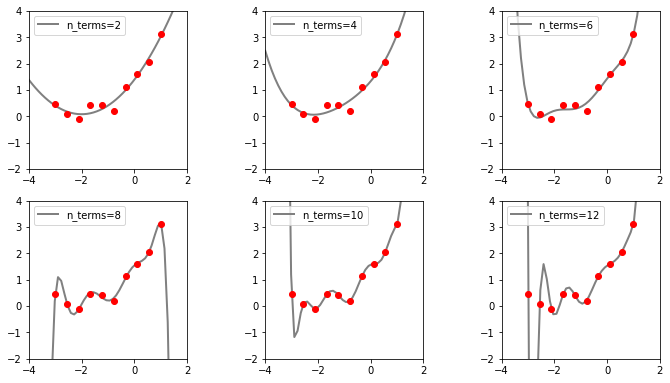

In [17]:
# 説明変数の数に応じた予測式の変化例

import numpy as np
import random as rnd
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
 
def poly(intercept, coef, x):
    return intercept + sum([w * x**(n + 1) for n, w in enumerate(coef)])
 
xmin, xmax = -3, 1
xlim_min, xlim_max = -4, 2
ylim_min, ylim_max = -2, 4
 
 # データ数・説明変数の数・グラフとして表示する説明変数の設定
n_data = 10
n_features = 20
n_terms_list = [2, 4, 6, 8, 10, 12]
 
x = np.linspace(xmin, xmax, n_data)
y = np.exp(x) + [rnd.uniform(-0.5, 0.5) for n in range(n_data)]
 
df = pd.DataFrame(y, columns=['y'])
for n in range(n_features):
    df["x^{}".format(n+1)] = x**(n+1)
print(df.shape)
 
fig, axs = plt.subplots(2, 3, figsize=(12, 6.4))
axs_1d = axs.reshape(1, -1)[0]
 
linreg = LinearRegression()
 
x_graph = np.linspace(xlim_min, xlim_max)
 
for ax, n_terms in zip(axs_1d, n_terms_list):
    linreg.fit(df.iloc[:, 1:n_terms+1], df['y'])
    y_linreg = poly(linreg.intercept_, linreg.coef_, x_graph)
    ax.scatter(df['x^1'], df['y'], c='r', zorder=10)
    ax.plot(x_graph, y_linreg, c='gray', linewidth=2,
        label="n_terms={}".format(n_terms))
 
    ax.set_xlim(xlim_min, xlim_max)
    ax.set_ylim(ylim_min, ylim_max)
    ax.set_aspect('equal')
    ax.legend(loc='upper left')
 
plt.show()

そのため、このような多くの変数から回帰モデルを作成する場合にはOverfittingを避けるような工夫をする必要があります。

### 1. 情報量基準等を使用して変数選択をする。

全ての説明変数を使うのではなく、適切な変数の組み合わせを探してモデルを作る形です。さきほど皆さんに実習でやってもらった方法ですね。

AICが良くなるモデルだったり、$R^2$を使う場合は学習データだけでなく、テストデータの評価も良くなるようなモデルの作成を目指します。

モデルを作る際に、本当に目的変数(y)に影響を与えている重要な説明変数のみを上手く選択できれば良いモデルを作ることが出来そうです。

In [ ]:
# 例えば、3つの遺伝子の組み合わせ全て試して、テストデータを用いたR^2が良いものを探す…とか。
combinations


とはいえ、これでは良いモデルを作るためには50個の遺伝子の中から、膨大な遺伝子の組み合わせをちまちま探す必要が出てきてしまいます。そこで出て来るのが正則化と呼ばれる手法になります。

このアプローチは説明変数の選択を別の基準で行える場合に重要です。(遺伝子11は生物学的にyの値に影響を与えていることが知られている、など。)

### 2. 損失関数に正則化項を入れて過学習を抑制する。
そこで出て来るのが正則化と呼ばれる手法になります。

$$ y = \beta_{1} x_{1} + \beta_{2} x_{2} + ...  + \beta_{k} x_{k} + e $$

線形回帰モデルの学習では、残差の二乗の合計値、**目的関数**である**残差平方和 (residual sum of squares)** が最も小さくなる係数 $\beta$ と誤差 $e$ の直線を求めていました。

$$ 残差平方和: \sum_{i=1}^{N} (\hat{y}_{i} - y_i)^2 $$

<img src="https://lh3.googleusercontent.com/pw/ACtC-3eIFmh8PDRx64eFArwdgxO2CGt3PEi272ny1dyqAMue0un_yL_GMgZ0CsyvBnX4lEC9BfOEdfTNGsiEG-R4xZDPM9zMHwHcINcnQFxcdTmSgsF7LotLsBpwzs0S49fZtN1fQrbHY7JrB9m2kwuDGb9r=w815-h560-no?authuser=0" alt="least squares" height="180px">

正則化では、この残差平方和に正則化項(罰則項)というものを加え、この値を最小化するような係数 $\beta$ と誤差 $e$ を求めます。

$$ \sum_{i=1}^{N} (\hat{y}_{i} - y_i)^2 + \alpha\sum_{j=1}^{k} |\beta_j|^p$$

正則化項を加えることで、全体的に偏回帰係数 $\beta$ の重みの影響を制限しようとする (係数の絶対値を小さくする) 形になります。

言葉で説明すると...、学習データの誤差や外れ値まで説明できるように、実際はあまり重要ではない変数の偏回帰係数の値を大きくしたら、罰則化項によって目的関数が大きくなってしまうので、多くの学習データの説明に重要な影響を与えている様な説明変数の偏回帰係数にだけ重み付けを行えるようにしている。という形でしょうか。

このノルムにおいて、p=1(L1ノルム)の場合をLasso回帰、p=2(L2ノルム)の場合をRidge回帰と呼び、どちらも回帰係数の重みに対して制限をしようとしますが、以下の様な特徴が異なります。

**Ridge回帰**
$$ \sum_{i=1}^{N} (\hat{y}_{i} - y_i)^2 + \alpha\sum_{j=1}^{k} |\beta_j|^2$$

係数の重みの強さを制限する効果を持ち、説明変数間の相関性が強い場合などにも予測式が不安定にならない傾向がある。

**Lasso回帰**
$$ \sum_{i=1}^{N} (\hat{y}_{i} - y_i)^2 + \alpha\sum_{j=1}^{k} |\beta_j|$$

Ridge回帰と同じく、係数の重みを制限し、正則化を強めるとともに係数がゼロとなり、選択された説明変数のみでモデルを構築できる。

また、両者の正則化項を組み合わせた**ElasticNet**と呼ばれるものもあります。

In [47]:
# 遺伝子50個を使用し、Ridge回帰を使ってみる
# 使用する変数
import numpy as np
x = np.array(df.loc[:,"gene_1":]) # 説明変数50個
y = np.array(df["phenotype"])   # 目的変数

# データ分割: 100サンプルを「トレーニングデータ70%、テストデータ30%」に分ける
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.transform(x_test)

# モデル選択＆学習、ここでRidgeを指定。alphaは正則化の強さ
from sklearn.linear_model import Lasso, Ridge
lr50 = Ridge(alpha=3)
lr50.fit(x_train_ss, y_train)

# 係数b、誤差e
b = lr50.coef_
e = lr50.intercept_
print("Coefficient=", b)
# print("Intercept="  , e)

# モデルの評価: 決定係数R2
r2_train_ss = lr50.score(x_train_ss, y_train)  # トレーニングデータ
r2_test_ss = lr50.score(x_test_ss, y_test)    # テストデータ
print("training: ", r2_train_ss)
print("test: "    , r2_test_ss)

Coefficient= [-0.09837905 -1.20946717 -0.30252653 -0.45922002 -0.54602016 -1.40379843
 -0.53169951 -0.53510242 -0.11509993  0.39315535  1.78505403  0.60046197
 -1.39376781 -0.84913763  0.70758606 -0.46690386 -1.0753647  -0.26494364
  1.21325587  0.64772766 -0.05953757  1.26849056  1.21610602  1.76393224
 -1.31762386 -0.59529882 -0.33810497  1.96395903  0.60017642  0.06488966
 -0.18329932 -1.14297356  0.40012384  0.57858919 -0.22399018 -0.85313593
  0.914275    0.26466054 -0.27684644  0.79785685 -0.6662362  -0.60996568
  0.49259242 -0.95876531 -0.30139258  1.08983743  0.606337    1.54931487
 -0.2589634   2.82512205]
training:  0.9532822848631699
test:  0.4742104395843967


In [46]:
# 遺伝子50個を使用し、Lasso回帰を使ってみる
# 使用する変数
import numpy as np
x = np.array(df.loc[:,"gene_1":]) # 説明変数50個
y = np.array(df["phenotype"])   # 目的変数

# データ分割: 100サンプルを「トレーニングデータ70%、テストデータ30%」に分ける
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.transform(x_test)

# モデル選択＆学習、ここでLassoを指定。alphaは正則化の強さ
from sklearn.linear_model import Lasso, Ridge
lr50 = Lasso(alpha=0.3)
lr50.fit(x_train_ss, y_train)

# 係数b、誤差e
b = lr50.coef_
e = lr50.intercept_
print("Coefficient=", b)
# print("Intercept="  , e)

# モデルの評価: 決定係数R2
r2_train_ss = lr50.score(x_train_ss, y_train)  # トレーニングデータ
r2_test_ss = lr50.score(x_test_ss, y_test)    # テストデータ
print("training: ", r2_train_ss)
print("test: "    , r2_test_ss)

Coefficient= [ 0.         -0.11812517 -0.         -0.         -0.15500275 -1.15870018
 -1.24451302  0.         -0.          0.          1.23222698  0.
 -0.09158115 -0.1844029  -0.         -0.04862532 -0.10412297 -0.
  0.56375472  0.         -0.          0.79286073  0.          1.14764214
 -0.76752587 -0.         -0.          1.53766705  1.8091931   0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.          0.         -0.          0.         -0.77590328 -0.
 -0.         -1.10141944  0.          0.92980714  0.06533088  1.27741822
 -0.34611079  1.18367153]
training:  0.8549133051184812
test:  0.6799953079933205


Lasso回帰だと何をやってるのかイメージしやすいと思います。

正則化を強めていくことで偏回帰係数が0となる説明変数が増えていくので、少ない説明変数で目的変数を説明しようとするモデルになっていきます。

$$ 正則化なしだと\space y = \beta_{1} x_{1} + \beta_{2} x_{2} + ...  + \beta_{k} x_{k} + e $$

$$ y = \beta_{1} x_{1} + \beta_{2} x_{2} + ...  + \beta_{k} x_{k} + e $$

$$ y = \beta_{1} x_{1} + \beta_{2} x_{2} + ...  + \beta_{k} x_{k} + e $$


### 実習2

使う変数を自由に選択したり(50遺伝子全て使っても良いし、30遺伝子でスタートしても良い)、
Lasso回帰やRidge回帰(ElasticNetも使い方を調べて使ってみても良いです)を使用したり正則化の強さを調整したりして、時間内で作ることが出来る最高のモデル(テストデータの$R^2$が最高のもの)を作ってみてください。

In [ ]:
# 使用する変数
import numpy as np
x = 
y = np.array(df["phenotype"])   # 目的変数

# データ分割: 100サンプルを「トレーニングデータ70%、テストデータ30%」に分ける
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# モデル選択＆学習

---

## まとめ

　使用する説明変数の数を増やして、予測モデルの改善をおこないました。「機械学習 - 線形回帰（1）-」のテキストよりは良いスコア（決定係数）が得られたと思います。興味があれば、さらに良い予測モデルの構築をおこなってみてください。

　次回は、目的関数（コスト関数）の最小値を探すアルゴリズム **勾配法 Gradient method** を学びます。勾配法は、機械学習では非常に重要なアルゴリズムです。高度な機械学習モデル、ニューラルネットワーク（Neural network）などにも使われています。